# Project MMCS Data- Analysis

### 1) get first overview of the data available (using the data from october 2020)

In [4]:
import data_analysis.data as data

#import data frame 
october_data = data.load_data('10.csv')
october_data = october_data.drop(index=[5806,5853])

#total number of trips:
print(len(october_data))

print(october_data.dtypes)
october_data.head()


19377
started_at                   datetime64[ns, UTC]
ended_at                     datetime64[ns, UTC]
duration                                   int64
start_station_id                           int64
start_station_name                        object
start_station_description                 object
start_station_latitude                   float64
start_station_longitude                  float64
end_station_id                             int64
end_station_name                          object
end_station_description                   object
end_station_latitude                     float64
end_station_longitude                    float64
dtype: object


,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2020-10-01 01:50:02.035000+00:00,2020-10-01 02:19:36.385000+00:00,1774,1050,EICC,Outside Edinburgh International Conference Centre,55.946071,-3.210396,1102,Haymarket Station,Haymarket Station,55.945569,-3.218185
1,2020-10-01 02:07:21.040000+00:00,2020-10-01 02:53:34.548000+00:00,2773,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750
2,2020-10-01 02:08:37.692000+00:00,2020-10-01 03:05:53.355000+00:00,3435,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750,1744,Morningside Road,"Corner of Morningside Park, beside M&S",55.927985,-3.209750
3,2020-10-01 04:25:54.283000+00:00,2020-10-01 04:45:12.275000+00:00,1157,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,1025,Dundee Terrace,Corner of Dundee Street & Dundee Terrace,55.939710,-3.220589
4,2020-10-01 04:35:56.950000+00:00,2020-10-01 04:51:02.609000+00:00,905,1102,Haymarket Station,Haymarket Station,55.945569,-3.218185,262,Canonmills,near Tesco's,55.962804,-3.196284


### 2) calculate average trip length
    - How long is a bike occupied? 
    - How long until it is available again at another station
    - examine weather there are significant differences between weekday and weekend

In [ ]:
import numpy as np
import datetime as dt

# average trip length
difference = october_data['ended_at'] - october_data['started_at']
print('Overall the average trip length is ', np.mean(difference).floor('T'))

# on weekends
weekend_oct = october_data[october_data['started_at'].dt.weekday > 4]
diff_weekend = weekend_oct['ended_at'] - weekend_oct['started_at']
print('On the weekends we have a trip length of ', np.mean(diff_weekend).floor('T'))

# during the week
week_oct = october_data[october_data['started_at'].dt.weekday < 5]
diff_week = week_oct['ended_at'] - week_oct['started_at']
print('And during the week we observe an aberage length of ',np.mean(diff_week).floor('T'))

### 3) when does demand occur? 


In [ ]:
import matplotlib.pyplot as plt

# create a list of dataframes containing the total number of trips (over whole month) per hour over the course of a day
trip_data = october_data.set_index('started_at')
trip_data_red = trip_data.resample('H').count()['ended_at']
trip_data_red.columns = ['number_of_trips']

DFList = []
for group in trip_data_red.groupby(trip_data_red.index.day):
    DFList.append(group[1])
#print(np.shape(DFList[1]))

# set the index to hour only in order to plot is as required
for i in range(len(DFList)):
    DFList[i].index = DFList[i].index.hour
    
#print((DFList[1]))

# plot a line for each day of the month
fig, ax = plt.subplots(figsize=(9,6))

for i in range(len(DFList)):
    ax.plot(DFList[i])
ax.set_xlabel(r'$hour$')
ax.set_ylabel('number of trips per hour')
ax.set_xticks(range(25))
plt.grid()   
plt.show()







### 4) compute the average demand and arrivals per hour for each station

    --> mean can be interpreted as the parameter of an exponential random variable (create poisson process of bikes at
        station???)

In [ ]:
import pandas as pd
import data_analysis.data as data
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

october_dict = data.hourly_data_by_station(data.load_data('10.csv'))
#print(october_dict)   #hour  mean_demand_per_hour  mean_arrivals_per_hour net_flow_value



In [ ]:
october_dict['Meadows East'].net_flow_value[0:8].min()


In [ ]:
oct = data.load_data('10.csv')
oct = oct.set_index('started_at', drop=False)

# split dataframe by day and store all dataframens in a list
oct_day = []
for group in oct.groupby(oct.index.day):
    oct_day.append(group[1])

# get summarised data by station for 1rst of october    
oct_1 = data.hourly_data_by_station(oct_day[0])
#specify the hour and station of interest and get net flow value
oct_1['Meadow Place'][oct_1['Meadow Place'].hour == 15].iloc[0, 3]

In [ ]:
# get net flow value for 1 station (Meadow Place) for 1h (3pm) for every day in october

net_flow_MP = []
for day in oct_day:
    dict = data.hourly_data_by_station(day)
    net_flow_MP.append(dict['Meadow Place'][dict['Meadow Place'].hour == 15].iloc[0, 3])
    
net_flow_MP

In [ ]:
lamda = october_dict['Meadow Place']['net_flow_value'][15-1]

# Display histogram of the sample:
plt.hist(net_flow_MP, density=True, bins=10, alpha=0.7)

# draw theoretical pdf
dist = poisson(lamda)
x = np.arange(-15,5)
plt.plot(x, dist.pmf(x), color='red', linestyle='--', label='lamda=5')

plt.show()

In [ ]:
# generate random numbers for poisson process
s = np.random.poisson(5, 100000)

# Display histogram of the sample:
plt.hist(s, density=True, bins=17, alpha=0.7)

# draw theoretical pdf
dist = poisson(5)
x = np.arange(-1,17)
plt.plot(x, dist.pmf(x), color='red', linestyle='--', label='lamda=5')

plt.show()

#calculate 80% confidence intervall
poisson.interval(0.80, 5, loc=0)

In [ ]:
# classification of stations
fig, ax = plt.subplots(figsize=(8,6))

stations_to_plot = ['Portobello - Kings Road', 'Meadow Place', 'East London Street', 'George Square']

for station in stations_to_plot:
    ax.plot(october_dict[station]['net_flow_value'], label=station)
    
ax.set_xlabel(r'$hour$')
ax.set_ylabel('net flow value')
ax.set_xticks(range(25))
ax.legend(loc='lower left')
plt.grid()   
plt.text(18, 5.2, 'supply station', fontsize=15, color='blue')
plt.text(18, -4.5, 'demand station', fontsize=15, color='orange')
plt.text(18, 1, 'leveled station', fontsize=15, color='red')
plt.text(18, -1, 'leveled station', fontsize=15, color='green')
plt.show()

    

In [ ]:
import pandas as pd

# For the whole month:

# create a dataframe containing the number of arrivals at the respective stations
data_arrivals = october_data.groupby('end_station_name', as_index=False).count()[['end_station_name','started_at']]
data_arrivals.columns = ['station_name', 'number_of_arrivals']
data_arrivals

# create a dataframe containing the number of departures from the respective stations
data_departures = october_data.groupby('start_station_name', as_index=False).count()[['start_station_name','started_at']]
data_departures.columns = ['station_name', 'number_of_departures']
data_departures

# merge the two dataframes
arr_dep = pd.merge(data_arrivals, data_departures, how ='outer', on ='station_name')  
arr_dep['difference'] = ''
# add row containing the net demand (i.e the difference)
for i in range(len(arr_dep)):
    arr_dep.iloc[i, 3] = arr_dep.iloc[i, 1] - arr_dep.iloc[i, 2]

(arr_dep.sort_values(by=['difference']))

### 5) compute number of trips per arc and try to visualize result

In [ ]:
import pandas as pd
%matplotlib notebook
import networkx as nx
import matplotlib.pyplot as plt


# create dataframe that contains the number of trips per month on each arc
num_trips = october_data.groupby(['start_station_name','end_station_name']).agg({'started_at': ['count']}).reset_index()
num_trips.columns = ['start_station_name', 'end_station_name', 'number_of_trips']
num_trips.head()
num_trips_filtered = num_trips[num_trips.start_station_name != num_trips.end_station_name]
num_trips_filtered.sort_values(by=['number_of_trips'], ascending=False)

top_connections = num_trips_filtered[num_trips_filtered.number_of_trips > 22]

#plot the network
graph = nx.from_pandas_edgelist(top_connections, source = 'start_station_name', target = 'end_station_name', edge_attr = True, create_using = nx.DiGraph())
plt.figure(figsize = (8,8))
nx.draw_networkx(graph)
plt.show()

#other useful functions:
# G.subgraph([nodes for subgraph])


In [ ]:
top_connections = num_trips_filtered[num_trips_filtered.number_of_trips > 40]
top_connections

In [ ]:
# network analysis

# returns True or False whether Graph is connected 
print(nx.is_strongly_connected(graph))
print(nx.is_weakly_connected(graph))
  
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(graph)) 
  
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(graph)) 


# getting different graph attributes 
print("Total number of nodes: ", int(graph.number_of_nodes())) 
print("Total number of edges: ", int(graph.number_of_edges())) 
#print("List of all nodes: ", list(graph.nodes())) 
#print("List of all edges: ", list(graph.edges())) 

# Centralitydegree(v) = d_v/(|N|-1), where d_v is the degree of node v and N is the set of all nodes of the Graph.
# allows us to pinpoint the most important nodes of a Graph = Hubs in the transportation network
deg_centrality = nx.degree_centrality(graph) 
in_deg_centrality = nx.in_degree_centrality(graph) 
out_deg_centrality = nx.out_degree_centrality(graph) 
print(deg_centrality) 

# Page Rank: Important nodes are those with many inlinks from important nodes
# (maybe to identify stations where bikes have to be picked up)
pr = nx.pagerank(graph, alpha = 0.8) 
#print(pr) 

### 6) compute distance between stations

In [2]:
# compute distance between stations
import pandas as pd
import data_analysis.data as data

raw_data = (data.load_data('10.csv'))
raw_data[raw_data.start_station_name == 'Picady Place']
raw_data[raw_data.end_station_name == 'Picady Place']
raw_data = raw_data.drop(index=[5806,5853])

# get names of all existing stations
unique_stations = raw_data.start_station_name.unique()

#create empty dataframe
df_loc = pd.DataFrame(columns = ['station_name', 'latitude', 'longitude'])

# extract coordinates for each station
for station in unique_stations:
    lat = (raw_data[raw_data['start_station_name'] == station].iloc[0,6])
    long = (raw_data[raw_data['start_station_name'] == station].iloc[0,7])
    new_row = {'station_name': station, 'latitude': lat, 'longitude': long}
    #append row to the dataframe
    df_loc = df_loc.append(new_row, ignore_index=True)

    
df_dist = pd.DataFrame(columns = ['station_1', 'station_2', 'distance'])
# calculate distances
for station_1 in df_loc['station_name']:
    for station_2 in df_loc['station_name']:
        lat_1 = df_loc[df_loc['station_name'] == station_1].iloc[0,1]
        long_1 = df_loc[df_loc['station_name'] == station_1].iloc[0,2]
        
        lat_2 = df_loc[df_loc['station_name'] == station_2].iloc[0,1]
        long_2 = df_loc[df_loc['station_name'] == station_2].iloc[0,2]
        
        dist = data.compute_distance(lat_1, long_1, lat_2, long_2)
        
        new_row = {'station_1': station_1, 'station_2': station_2, 'distance': dist}
        #append row to the dataframe
        df_dist = df_dist.append(new_row, ignore_index=True)

df_dist.sort_values(by=['distance']).head()


,station_1,station_2,distance
0,EICC,EICC,0.0
3441,Brunswick Place,Brunswick Place,0.0
3552,Causewayside,Causewayside,0.0
3663,Simon Square,Simon Square,0.0
3774,Dalry Road Lidl,Dalry Road Lidl,0.0


In [ ]:
df_dist[df_dist['station_1']=='Abbeyhill'][df_dist[df_dist['station_1']=='Abbeyhill']['station_2']=='Holyrood Road'].iloc[0,2]

### 7) Summarise close stations to one  by using k-means algorithm

In [5]:
close_stations = df_dist[df_dist['distance'] <= 0.25]
# thereshold is equivalent to about 2-3 min walk

close_stations = close_stations[close_stations.station_1 != close_stations.station_2]

df_close = pd.DataFrame(columns = ['station_name', 'latitude', 'longitude'])

# extract coordinates for each of the predetermined stations
for station in close_stations.station_1.unique():
    lat = (october_data[october_data['start_station_name'] == station].iloc[0,6])
    long = (october_data[october_data['start_station_name'] == station].iloc[0,7])
    new_row = {'station_name': station, 'latitude': lat, 'longitude': long}
    #append row to the dataframe
    df_close = df_close.append(new_row, ignore_index=True)


In [6]:

from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data_ = (df_close[['latitude','longitude']]) 
# 40 stations shall be somehow summarised/grouped together
data_.head()

,latitude,longitude
0,55.927985,-3.209750
1,55.953164,-3.181682
2,55.927818,-3.213308
3,55.949798,-3.187795
4,55.946643,-3.185475


Text(0, 0.5, 'Inertia')

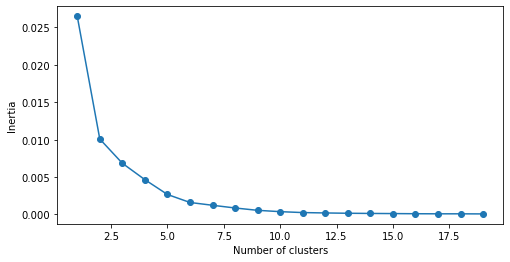

In [7]:
# calculate ellbow criterium to determine number of clusters 

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(8,4))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

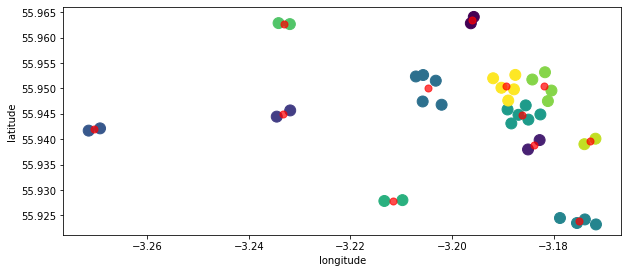

In [12]:
# choose K=12 and determine the clusters

import matplotlib.pyplot as plt

#Initialize the class object
kmeans = KMeans(n_clusters= 12)
 
#predict the labels of clusters.
pred = kmeans.fit_predict(data_)
plt.figure(figsize=(10,10)) 
plt.scatter(data_.longitude, data_.latitude, c=pred, s=120, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=50, alpha=0.7)

#for i in range(len(close_stations.station_1.unique())):    
 #   plt.text(df_close.longitude[i], df_close.latitude[i], str(df_close.station_name[i]), fontsize=8)
    
plt.xlabel('longitude')
plt.ylabel('latitude')
ax = plt.gca()
ax.set_aspect('equal')


plt.show()


In [20]:
# newly compoted centers for the clusters
print(centers)

# cluster that each of the 40 enties belongs to
print((pred))

# replace the coordinates of the stations accordingly
df_close['cluster'] = pred
df_close

for i in range(len(df_close)):
    for cluster in range(12+1):
        if df_close.cluster[i] == cluster:
            df_close.latitude[i] = centers[cluster][0]
            df_close.longitude[i] = centers[cluster][1]
            
df_close
        

[[55.93888637 -3.18388   ]
 [55.96274098 -3.23302574]
 [55.95012625 -3.20475328]
 [55.92790175 -3.21152875]
 [55.94189253 -3.27040525]
 [55.92383264 -3.17489829]
 [55.95048723 -3.18184656]
 [55.94503699 -3.23317243]
 [55.96343121 -3.19599197]
 [55.95042583 -3.18927796]
 [55.93954044 -3.17283521]
 [55.94483995 -3.18621435]]
[ 3  6  3  9 11  0  9  2 11  8 11 11  2  9  1  5  5  2  5 10 10  9  2 11
  7  0  6  1  6 11  4  7  9  6  8  5  4  2]


<ipython-input-20-a193df2f9999>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.latitude[i] = centers[cluster][0]
<ipython-input-20-a193df2f9999>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.longitude[i] = centers[cluster][1]


,station_name,latitude,longitude,cluster
0,Morningside Road,55.927902,-3.211529,3
1,St Andrews House,55.950487,-3.181847,6
2,Royal Edinburgh Hospital,55.927902,-3.211529,3
3,Hunter Square,55.950426,-3.189278,9
4,Surgeons Hall,55.944840,-3.186214,11
5,Meadows East,55.938886,-3.183880,0
6,Waverley Bridge,55.950426,-3.189278,9
7,Charlotte Square,55.950126,-3.204753,2
8,Bristo Square,55.944840,-3.186214,11
9,Canonmills,55.963431,-3.195992,8


### 8) classify stations based on their net flow value for different time intervals and preselect for time intervals

 - create dataframe containing:
         * minimum number of bikes that has to be available during that period
         * net flow value at the end of the period 
         * classification as a demand/supply or leveled sation based on nfv at end of period
 - regarding the periods, 3 periods were chosen to distinguish between demand arising in the morning , during the day and      in the evening, in order to take into account that due patterns such as commuting a station's classification might be      different depending on the analysed period
         * 1. period: 0-8am
         * 2. period: 8am-4pm
         * 3. period: 4pm-12pm

In [21]:
# create dataframe containing all stations with their coordinates
df_location = pd.DataFrame(columns = ['station_name', 'latitude', 'longitude'])

for station in df_dist.station_1.unique():
    lat = (october_data[october_data['start_station_name'] == station].iloc[0,6])
    long = (october_data[october_data['start_station_name'] == station].iloc[0,7])
    new_row = {'station_name': station, 'latitude': lat, 'longitude': long}
    #append row to the dataframe
    df_location = df_location.append(new_row, ignore_index=True)

df_location.tail()

,station_name,latitude,longitude
105,Borrowman Square,55.982606,-3.381455
106,Tesco Ferrymuir,55.983766,-3.401352
107,Picardy Place,55.956535,-3.186248
108,Scotstoun House,55.981107,-3.394211
109,Eden Locke - Aparthotel (RESIDENTS ONLY),55.952619,-3.205678


In [22]:
raw_data = (data.load_data('10.csv'))
raw_data[raw_data.start_station_name == 'Picady Place']
raw_data[raw_data.end_station_name == 'Picady Place']
raw_data = raw_data.drop(index=[5806,5853])
# observed mistake in data: remove 'Picady Place'

october_dict = data.hourly_data_by_station(raw_data)

In [23]:
# cluster 0
cluster_0 = october_dict['Kings Building 2'] + october_dict['Kings Building 3'] + october_dict['Kings Buildings 1'] + october_dict['Kings Buildings - Murchison House']
# cluster 1
cluster_1 = october_dict['Canonmills'] + october_dict['Logie Green Road']
# cluster 2
cluster_2 = october_dict['IGMM - Western General'] + october_dict['Western General Hospital'] 
# cluster 3
cluster_3 = october_dict['Surgeons Hall'] + october_dict['Bristo Square'] + october_dict['West Crosscauseway'] + october_dict['Simon Square'] + october_dict['George Square'] + october_dict['Crichton Street']
# cluster 4
cluster_4 = october_dict['Corstorphine Road'] + october_dict['Edinburgh Zoo']
# cluster 5
cluster_5 = october_dict['Morningside Road'] + october_dict['Royal Edinburgh Hospital']
# cluster 6
cluster_6 = october_dict['Charlotte Square'] + october_dict['Castle Street'] + october_dict['Castle Terrace'] + october_dict['Lothian Road']# + october_dict['Eden Locke - Aparthotel (RESIDENTS ONLY)']
# cluster 7
cluster_7 = october_dict['Roseburn Street'] + october_dict['Wester Coates Terrace']
# cluster 8
cluster_8 = october_dict['St Andrews House'] + october_dict['Holyrood Road'] + october_dict['Waverley Court'] + october_dict['Pleasance Courtyard']
# cluster 9
cluster_9 = october_dict['Royal Commonwealth Pool'] + october_dict['Pollock Halls'] 
# cluster 10 
cluster_10 = october_dict['Hunter Square']  + october_dict['Waverley Bridge']  + october_dict['Chambers Street']  + october_dict['City Chambers']  + october_dict['Waverley Station'] 
# cluster 11
cluster_11 = october_dict['Meadows East'] + october_dict['Gladstone Terrace']

# summarize all dataframes in one list
list_of_clusters = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6, cluster_7, cluster_8, cluster_9, cluster_10, cluster_11]
list_of_cluster_names = ['cluster 0','cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6', 'cluster 7', 'cluster 8', 'cluster 9', 'cluster 10', 'cluster 11']



In [24]:
# create df containing clusternames and coordinates

df_cluster_loc = pd.DataFrame(columns = ['station_name', 'latitude', 'longitude'])

for c in range(len(list_of_clusters)):
    
    new_row = {'station_name': list_of_cluster_names[c], 'latitude':centers[c][0], 'longitude':centers[c][1]}
    #append row to the dataframe
    df_cluster_loc = df_cluster_loc.append(new_row, ignore_index=True)

df_cluster_loc

,station_name,latitude,longitude
0,cluster 0,55.938886,-3.183880
1,cluster 1,55.962741,-3.233026
2,cluster 2,55.950126,-3.204753
3,cluster 3,55.927902,-3.211529
4,cluster 4,55.941893,-3.270405
5,cluster 5,55.923833,-3.174898
6,cluster 6,55.950487,-3.181847
7,cluster 7,55.945037,-3.233172
8,cluster 8,55.963431,-3.195992
9,cluster 9,55.950426,-3.189278


In [25]:
# remove the stations that will be summarised by clusters
for station in df_close.station_name.values:
    del october_dict[station]

# add clusters to the dictionnary
for i in range(len(list_of_cluster_names)):
    october_dict[list_of_cluster_names[i]] = list_of_clusters[i]

In [26]:
from scipy.stats import poisson

# initialize df for first period
df_class_1 = pd.DataFrame(columns = ['station_name', 'min_available_1', 'net_flow_end_of_period_1', '80% demand quantile_1', 'classification_1'])

for station in october_dict.keys():
    
    if station == 'Scotstoun House' or station == 'Eden Locke - Aparthotel (RESIDENTS ONLY)':
        continue
    else:
        min_ = october_dict[station].net_flow_value[0:8].min()
        nf = october_dict[station].iloc[7,3]
        # if there is a negative net flow, extra step has to be taken since PP not defined for negative numbers
        if nf < 0:
            # calculate net demand as 80% quantile of PP with mean = mean net flow value
            # if the mean nfv is smaller than 0.1 this equates to 0 --> nothing happening at station
            d = poisson.interval(0.80, abs(nf), loc=0)[1]
            if d > 0:
                class_ = 'demand'
            else:
                class_ = 'leveled'
        elif nf > 0.3:
            # if mean net flow value at the end of the time intervall is > 0.3 classify as supply station
            d = 0
            class_ = 'supply'
        else:
            d = 0
            class_ = 'leveled'

        new_row = {'station_name': station, 'min_available_1': min_, 'net_flow_end_of_period_1': nf, '80% demand quantile_1': d, 'classification_1': class_}
        #append row to the dataframe
        df_class_1 = df_class_1.append(new_row, ignore_index=True)

df_class_1.tail(12)

,station_name,min_available_1,net_flow_end_of_period_1,80% demand quantile_1,classification_1
71,cluster 0,-0.068966,1.243678,0.0,supply
72,cluster 1,-1.093103,-1.093103,2.0,demand
73,cluster 2,0.000000,2.214943,0.0,supply
74,cluster 3,-0.431034,-0.431034,1.0,demand
75,cluster 4,0.034483,0.439473,0.0,supply
76,cluster 5,-0.061365,-0.061365,0.0,leveled
77,cluster 6,-0.448276,1.457471,0.0,supply
78,cluster 7,-0.253448,-0.253448,1.0,demand
79,cluster 8,-0.165435,0.221921,0.0,leveled
80,cluster 9,0.080460,0.080460,0.0,leveled


In [27]:
df_class_2 = pd.DataFrame(columns = ['station_name', 'min_available_2', 'net_flow_end_of_period_2', '80% demand quantile_2', 'classification_2'])

for station in october_dict.keys():
    
    if station == 'Scotstoun House' or station == 'Eden Locke - Aparthotel (RESIDENTS ONLY)':
        continue
    else:
        min_ = (october_dict[station].net_flow_value[8:16] - october_dict[station].iloc[7,3]).min()
        nf = october_dict[station].iloc[15,3] - october_dict[station].iloc[7,3]
        # if there is a negative net flow, extra step has to be taken since PP not defined for negative numbers
        if nf < 0:
            # calculate net demand as 80% quantile of PP with mean = mean net flow value
            # if the mean nfv is smaller than 0.1 this equates to 0 --> nothing happening at station
            d = poisson.interval(0.80, abs(nf), loc=0)[1]
            if d > 0:
                class_ = 'demand'
            else:
                class_ = 'leveled'
        elif nf > 0.3:
            # if mean net flow value at the end of the time intervall is > 0.3 classify as supply station
            d = 0
            class_ = 'supply'
        else:
            d = 0
            class_ = 'leveled'

        new_row = {'station_name': station, 'min_available_2': min_, 'net_flow_end_of_period_2': nf, '80% demand quantile_2': d, 'classification_2': class_}
        #append row to the dataframe
        df_class_2 = df_class_2.append(new_row, ignore_index=True)

df_class_2.tail(12)

,station_name,min_available_2,net_flow_end_of_period_2,80% demand quantile_2,classification_2
71,cluster 0,2.241379,4.163218,0.0,supply
72,cluster 1,0.101149,2.029885,0.0,supply
73,cluster 2,-0.327586,-0.327586,1.0,demand
74,cluster 3,-3.137931,-3.137931,5.0,demand
75,cluster 4,-0.081554,-0.075488,0.0,leveled
76,cluster 5,-1.437286,-1.316074,3.0,demand
77,cluster 6,-1.000000,-1.000000,2.0,demand
78,cluster 7,-0.873563,-0.737931,2.0,demand
79,cluster 8,-1.864860,-1.864860,4.0,demand
80,cluster 9,-5.447126,-5.447126,9.0,demand


In [28]:
df_class_3 = pd.DataFrame(columns = ['station_name', 'min_available_3', 'net_flow_end_of_period_3', '80% demand quantile_3', 'classification_3'])

for station in october_dict.keys():
    
    if station == 'Scotstoun House' or station == 'Eden Locke - Aparthotel (RESIDENTS ONLY)':
        continue
    else:
        min_ = (october_dict[station].net_flow_value[16:] - october_dict[station].iloc[15,3]).min()
        nf = october_dict[station].iloc[23,3] - october_dict[station].iloc[15,3]
        # if there is a negative net flow, extra step has to be taken since PP not defined for negative numbers
        if nf < 0:
            # calculate net demand as 80% quantile of PP with mean = mean net flow value
            # if the mean nfv is smaller than 0.1 this equates to 0 --> nothing happening at station
            d = poisson.interval(0.80, abs(nf), loc=0)[1]
            if d > 0:
                class_ = 'demand'
            else:
                class_ = 'leveled'
        elif nf > 0.3:
            # if mean net flow value at the end of the time intervall is > 0.3 classify as supply station
            d = 0
            class_ = 'supply'
        else:
            d = 0
            class_ = 'leveled'

        new_row = {'station_name': station, 'min_available_3': min_, 'net_flow_end_of_period_3': nf, '80% demand quantile_3': d, 'classification_3': class_}
        #append row to the dataframe
        df_class_3 = df_class_3.append(new_row, ignore_index=True)

df_class_3.tail(12)

,station_name,min_available_3,net_flow_end_of_period_3,80% demand quantile_3,classification_3
71,cluster 0,-4.525698,-4.525698,7.0,demand
72,cluster 1,0.366667,1.468391,0.0,supply
73,cluster 2,-1.451724,-1.037931,2.0,demand
74,cluster 3,-9.047126,-8.765517,13.0,demand
75,cluster 4,-0.379174,0.068920,0.0,leveled
76,cluster 5,0.142424,1.829154,0.0,supply
77,cluster 6,-7.481609,-7.481609,11.0,demand
78,cluster 7,0.253530,1.462726,0.0,supply
79,cluster 8,-0.763629,-0.763629,2.0,demand
80,cluster 9,0.700000,1.081609,0.0,supply


In [29]:
# merge dataframes together
df_1_2 = pd.merge(df_class_1, df_class_2, on='station_name')
df_1_2_3 = pd.merge(df_1_2, df_class_3, on='station_name')
# add columns with coordinates
df_complete = pd.merge(df_1_2_3, df_location.append(df_cluster_loc), on='station_name', how='left') 
# add exception for clusters

df_complete.tail()



,station_name,min_available_1,net_flow_end_of_period_1,80% demand quantile_1,classification_1,min_available_2,net_flow_end_of_period_2,80% demand quantile_2,classification_2,min_available_3,net_flow_end_of_period_3,80% demand quantile_3,classification_3,latitude,longitude
78,cluster 7,-0.253448,-0.253448,1.0,demand,-0.873563,-0.737931,2.0,demand,0.253530,1.462726,0.0,supply,55.945037,-3.233172
79,cluster 8,-0.165435,0.221921,0.0,leveled,-1.864860,-1.864860,4.0,demand,-0.763629,-0.763629,2.0,demand,55.963431,-3.195992
80,cluster 9,0.080460,0.080460,0.0,leveled,-5.447126,-5.447126,9.0,demand,0.700000,1.081609,0.0,supply,55.950426,-3.189278
81,cluster 10,-0.172414,0.962580,0.0,supply,-1.764897,-1.764897,4.0,demand,-7.012005,-7.012005,10.0,demand,55.939540,-3.172835
82,cluster 11,-0.448276,-0.354023,1.0,demand,-3.320690,-3.187356,6.0,demand,-0.700000,0.182759,0.0,leveled,55.944840,-3.186214


In [31]:
columns = ['station_name', 'latitude', 'longitude','classification_1','classification_2','classification_3']
#df_complete[columns].to_csv('loc_class.csv')

In [ ]:
# plot the result 

# set colors according to station classification
colors = {'demand':'red', 'leveled':'green', 'supply':'blue'}

# plot first period
fig1, ax1 = plt.subplots()
grouped = df_complete.groupby('classification_1')
for key, group in grouped:
    group.plot(ax=ax1, kind='scatter', x='latitude', y='longitude', label=key, color=colors[key])
ax1.set_title('station classification between 0:00 and 8:00')
    
# plot second period
fig2, ax2 = plt.subplots()
grouped = df_complete.groupby('classification_2')
for key, group in grouped:
    group.plot(ax=ax2, kind='scatter', x='latitude', y='longitude', label=key, color=colors[key])
ax2.set_title('station classification between 8:00 and 16:00')
    
# plot third period
fig3, ax3 = plt.subplots()
grouped = df_complete.groupby('classification_3')
for key, group in grouped:
    group.plot(ax=ax3, kind='scatter', x='latitude', y='longitude', label=key, color=colors[key])
    
ax3.set_title('station classification between 16:00 and 24:00')

plt.show()

In [ ]:
to_cluster_1 = df_complete[df_complete.classification_1 == 'demand'][['station_name','latitude', 'longitude']].reset_index()
#to_cluster_1.to_csv('demand_stations_period_1')

In [ ]:
# clusters and their centers calculated in kmeans file 
# 31 demand stations in period 1
centers_period_1 = np.array([[55.94480758, -3.25527729],[55.95490534, -3.16378527],[55.94149086, -3.19848893]])
clusters_period_1 = [2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,]

#visualize result
plt.figure(figsize=(8,8)) 
plt.scatter(to_cluster_1.latitude, to_cluster_1.longitude, c=clusters_period_1, s=120, cmap='viridis')

plt.scatter(centers_period_1[:, 0], centers_period_1[:, 1], c='red', s=50, alpha=0.7)

for i in range(len(to_cluster_1)):    
    plt.text(to_cluster_1.latitude[i], to_cluster_1.longitude[i], str(to_cluster_1.station_name[i]), fontsize=8)
    
plt.xlabel('latitude')
plt.ylabel('longitude')


plt.show()


In [ ]:
# add identified clusters to dataframe
to_cluster_1['cluster'] = clusters_period_1
to_cluster_1.groupby('cluster').get_group(0)

In [ ]:
to_cluster_2 = df_complete[df_complete.classification_2 == 'demand'][['station_name','latitude', 'longitude']].reset_index()
#to_cluster_2.to_csv('demand_stations_period_2')

<IPython.core.display.Javascript object>


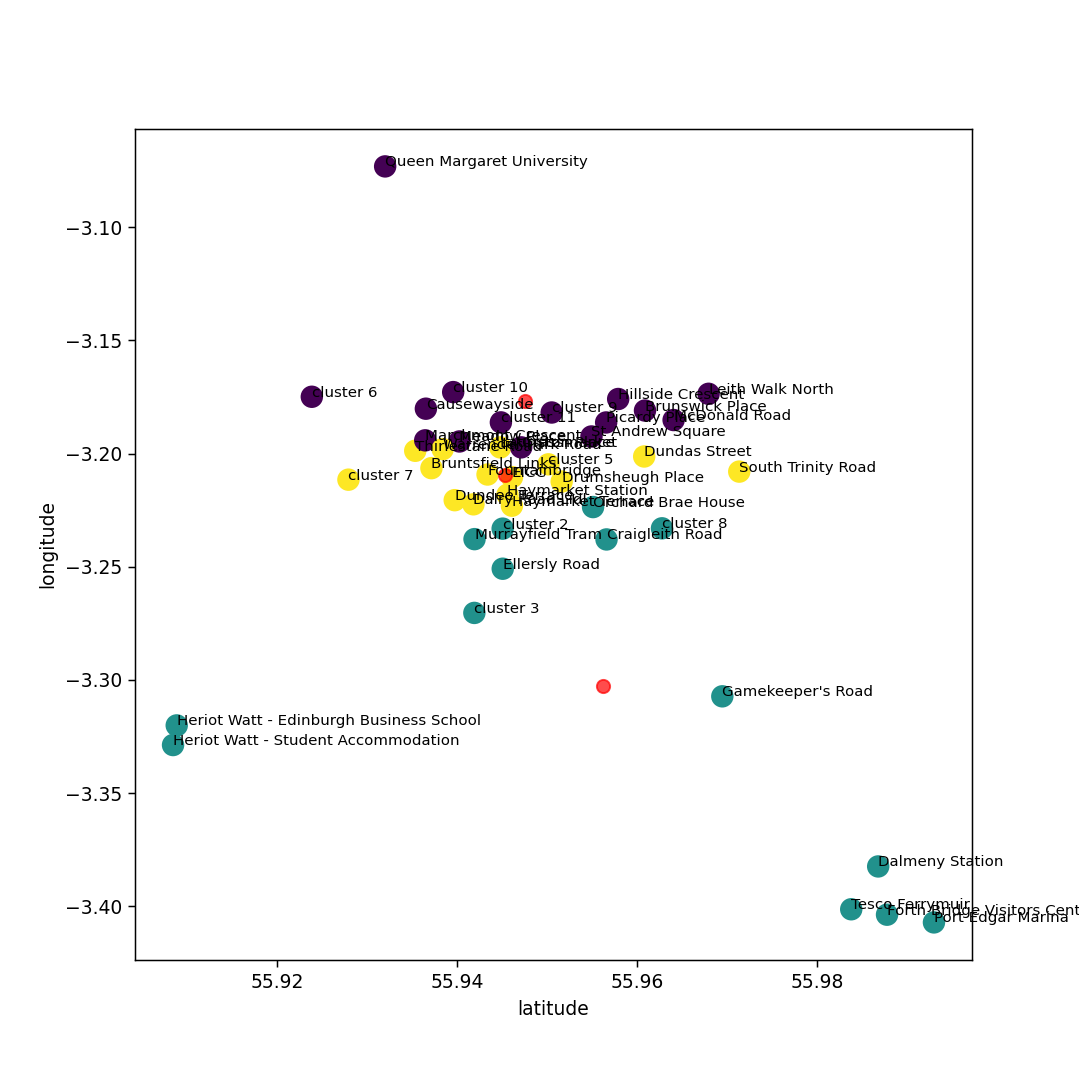

In [172]:
# clusters and their centers calculated in kmeans file 
# 44 demand stations in period 2
centers_period_2 = np.array([[55.94753783, -3.17662857], [55.95615666, -3.30269301], [55.94532399, -3.2094819 ]])
clusters_period_2 = [2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0]

#visualize result
plt.figure(figsize=(8,8)) 
plt.scatter(to_cluster_2.latitude, to_cluster_2.longitude, c=clusters_period_2, s=120, cmap='viridis')

plt.scatter(centers_period_2[:, 0], centers_period_2[:, 1], c='red', s=50, alpha=0.7)

for i in range(len(to_cluster_2)):    
    plt.text(to_cluster_2.latitude[i], to_cluster_2.longitude[i], str(to_cluster_2.station_name[i]), fontsize=8)
    
plt.xlabel('latitude')
plt.ylabel('longitude')


plt.show()


In [ ]:
to_cluster_3 = df_complete[df_complete.classification_3 == 'demand'][['station_name','latitude', 'longitude']].reset_index()
#to_cluster_3.to_csv('demand_stations_period_3')

In [ ]:
# clusters and their centers calculated in kmeans file 
# 16 demand stations in period 3
centers_period_3 = np.array([[55.93627322, -3.17353938], [55.95520882, -3.27123135], [55.94663393, -3.19900025]])
clusters_period_3 = [0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0]

#visualize result
plt.figure(figsize=(8,8)) 
plt.scatter(to_cluster_3.latitude, to_cluster_3.longitude, c=clusters_period_3, s=120, cmap='viridis')

plt.scatter(centers_period_3[:, 0], centers_period_3[:, 1], c='red', s=50, alpha=0.7)

for i in range(len(to_cluster_3)):    
    plt.text(to_cluster_3.latitude[i], to_cluster_3.longitude[i], str(to_cluster_3.station_name[i]), fontsize=8)
    
plt.xlabel('latitude')
plt.ylabel('longitude')


plt.show()


### 9) get real time data from the web for the bike availability at stations

In [72]:
import urllib
import pandas as pd
import numpy as np
import requests
import json

request = 'https://gbfs.urbansharing.com/edinburghcyclehire.com/station_status.json'
data = requests.get(request)
json_data = (data.json()['data'])
type(json_data)
bike_availability = pd.DataFrame(json_data['stations'])

bike_availability.head()

,station_id,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_docks_available
0,2268,1,1,1,1606699954,1,19
1,2265,1,1,1,1606699954,1,9
2,2263,1,1,1,1606699954,4,12
3,2259,1,1,1,1606699954,0,14
4,1877,1,1,1,1606699954,2,13


In [73]:
name_id = pd.DataFrame(columns= ['station_id','station_name'])
for id_ in list(map(int, bike_availability.station_id.values)):
    if id_ == 1030:
        continue
    #print(october_data[october_data['start_station_id'] == id_].start_station_name.values[0])
    name = october_data[october_data['start_station_id'] == id_].iloc[0,4]
    new_row = {'station_id': int(id_), 'station_name': name}
    name_id = name_id.append(new_row, ignore_index=True)

# add column with station names to the dataframe
bike_availability['station_id'] = bike_availability['station_id'].astype(int)
bike_availability = pd.merge(bike_availability, name_id, on= 'station_id', how='left')


In [74]:
bikes_av = bike_availability[['station_name','num_bikes_available']]
bikes_av.head()

,station_name,num_bikes_available
0,Picardy Place,1
1,Musselburgh Brunton Hall,1
2,Musselburgh Lidl,4
3,Leith Walk North,0
4,Port Edgar Marina,2


In [75]:
# cluster 
cluster_0 = ['Kings Building 2','Kings Building 3', 'Kings Buildings 1', 'Kings Buildings - Murchison House'] 
cluster_1 = ['Canonmills', 'Logie Green Road']
cluster_2 = ['IGMM - Western General', 'Western General Hospital'] 
cluster_3 = ['Surgeons Hall', 'Bristo Square', 'West Crosscauseway', 'Simon Square','George Square','Crichton Street']
cluster_4 = ['Corstorphine Road', 'Edinburgh Zoo']
cluster_5 = ['Morningside Road', 'Royal Edinburgh Hospital']
cluster_6 = ['Charlotte Square', 'Castle Street', 'Castle Terrace', 'Lothian Road']
cluster_7 = ['Roseburn Street','Wester Coates Terrace']
cluster_8 = ['St Andrews House', 'Holyrood Road', 'Waverley Court','Pleasance Courtyard']
cluster_9 = ['Royal Commonwealth Pool', 'Pollock Halls'] 
cluster_10 = ['Hunter Square', 'Waverley Bridge', 'Chambers Street', 'City Chambers', 'Waverley Station'] 
cluster_11 = ['Meadows East', 'Gladstone Terrace']

cluster_dict = {'cluster 0': cluster_0, 'cluster 1':cluster_1, 'cluster 2':cluster_2, 'cluster 3':cluster_3, 'cluster 4':cluster_4, 'cluster 5':cluster_5, 'cluster 6':cluster_6, 'cluster 7':cluster_7, 'cluster 8':cluster_8, 'cluster 9':cluster_9, 'cluster 10':cluster_10, 'cluster 11':cluster_11}

cluster_dict['cluster 0']

['Kings Building 2',
 'Kings Building 3',
 'Kings Buildings 1',
 'Kings Buildings - Murchison House']

In [76]:
for cluster in cluster_dict.keys():
    Sum = 0 
    for station in cluster_dict[cluster]:
        if len(bikes_av[bikes_av.station_name == station]) != 0:
            Sum += (bikes_av[bikes_av.station_name == station].iloc[0,1])
    new_row = {'station_name': cluster, 'num_bikes_available': Sum}
    bikes_av = bikes_av.append(new_row, ignore_index=True)
    


In [77]:
bikes_av.tail()


,station_name,num_bikes_available
117,cluster 7,2
118,cluster 8,4
119,cluster 9,2
120,cluster 10,7
121,cluster 11,3


In [78]:
# get demand data (for first of december)

dec_01 = pd.read_csv('Prediction data/2020-12-01_third.csv', delimiter=',', header=0)
period_2 = dec_01[dec_01.date == '2020-12-01 08:00:00']
period_2 = period_2.drop('date',axis=1)


for cluster in cluster_dict.keys():
    Ht = 0 
    TDt = 0
    for station in cluster_dict[cluster]:
        if len(period_2[period_2.station_name == station]) != 0:
            Ht += (period_2[period_2.station_name == station].iloc[0,1])
            TDt += (period_2[period_2.station_name == station].iloc[0,2])
    new_row = {'station_name': cluster, 'Ht': Ht, 'TDt':TDt}
    period_2 = period_2.append(new_row, ignore_index=True)
    
period_2.tail()

,station_name,Ht,TDt
131,cluster 7,0,0
132,cluster 8,0,1
133,cluster 9,-4,0
134,cluster 10,-3,2
135,cluster 11,-4,0


### 10) putting everything together

 

In [79]:
merged_df= pd.merge(period_2, bikes_av, on='station_name', how='right')
merged_df.tail()
merged_df['Ht_new'] = merged_df.Ht + merged_df.num_bikes_available
merged_df['TDt_new'] = merged_df.TDt + merged_df.num_bikes_available
merged_df = merged_df.drop(['Ht', 'TDt', 'num_bikes_available'],axis=1)
merged_df.tail()


,station_name,Ht_new,TDt_new
117,cluster 8,4.0,5.0
118,cluster 9,-2.0,2.0
119,cluster 10,4.0,9.0
120,cluster 11,-1.0,3.0
121,NaN,NaN,NaN


In [80]:
merged_df.to_csv('demand_dec_01_02')

### 11) runtime analysis

<IPython.core.display.Javascript object>


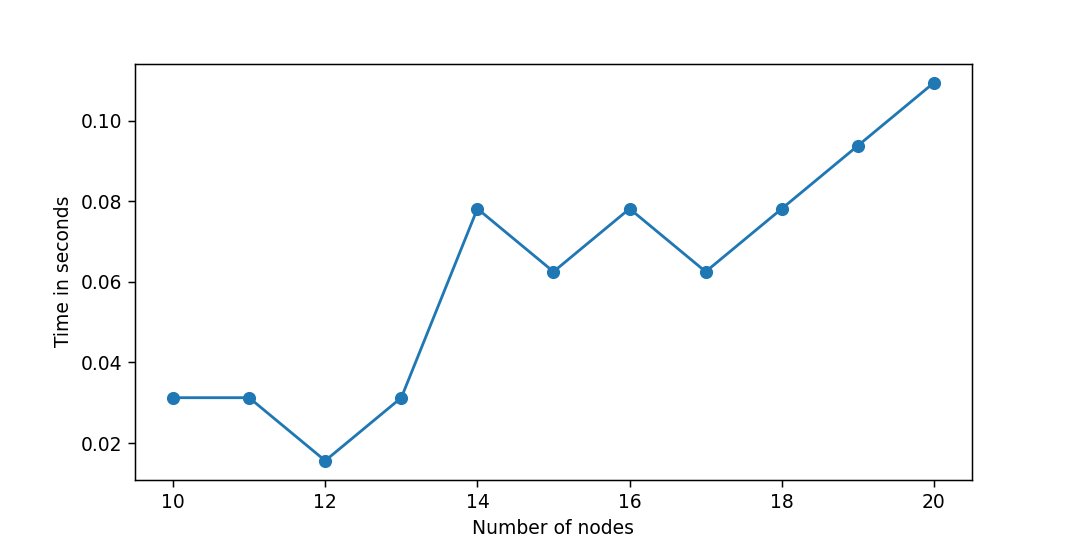

In [192]:

runtime_df = pd.DataFrame(columns=['number_of_nodes', 'computation_time'])
list_of_nodes = list(range(10,21))
list_of_nodes.reverse()
runtime_df.number_of_nodes = list_of_nodes
runtime_df.computation_time = [0.109375, 0.09375, 0.078125, 0.0625, 0.078125, 0.0625, 0.078125, 0.03125, 0.015625, 0.03125, 0.03125]

plt.figure(figsize=(8,4))
plt.plot(runtime_df['number_of_nodes'], runtime_df['computation_time'], marker='o')
plt.xlabel('Number of nodes')
plt.ylabel('Time in seconds')
plt.show()

### 12) further plots for the final report

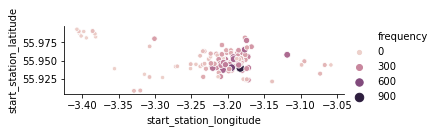

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


station_pivot = october_data.pivot_table(index='start_station_name',
                               values=['start_station_latitude',
                                        'start_station_longitude'],
                               aggfunc={'start_station_name': pd.Series.value_counts,
                                        'start_station_latitude': pd.Series.unique,
                                        'start_station_longitude': pd.Series.unique})

# Rename the 'start_station_name' column
station_pivot.rename(columns={'start_station_name': 'frequency'}, inplace=True)
station_pivot

graph = sns.relplot(data=station_pivot,
            kind='scatter',
            x='start_station_longitude',
            y='start_station_latitude',
            hue='frequency',
            size='frequency')
graph.ax.set_aspect('equal')

In [14]:
station_pivot.tail()

,start_station_latitude,start_station_longitude,frequency
start_station_name,,,
Waverley Court,55.951734,-3.184179,86
Waverley Station,55.952641,-3.187527,33
West Crosscauseway,55.943836,-3.184951,336
Wester Coates Terrace,55.945648,-3.231847,73
Western General Hospital,55.962840,-3.234136,86


In [19]:
import plotly.express as px
import pandas as pd

df = pd.read_csv('loc_class.csv', delimiter=',', header=0)
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',mapbox_style='carto-positron', color='cluster')

fig.show()

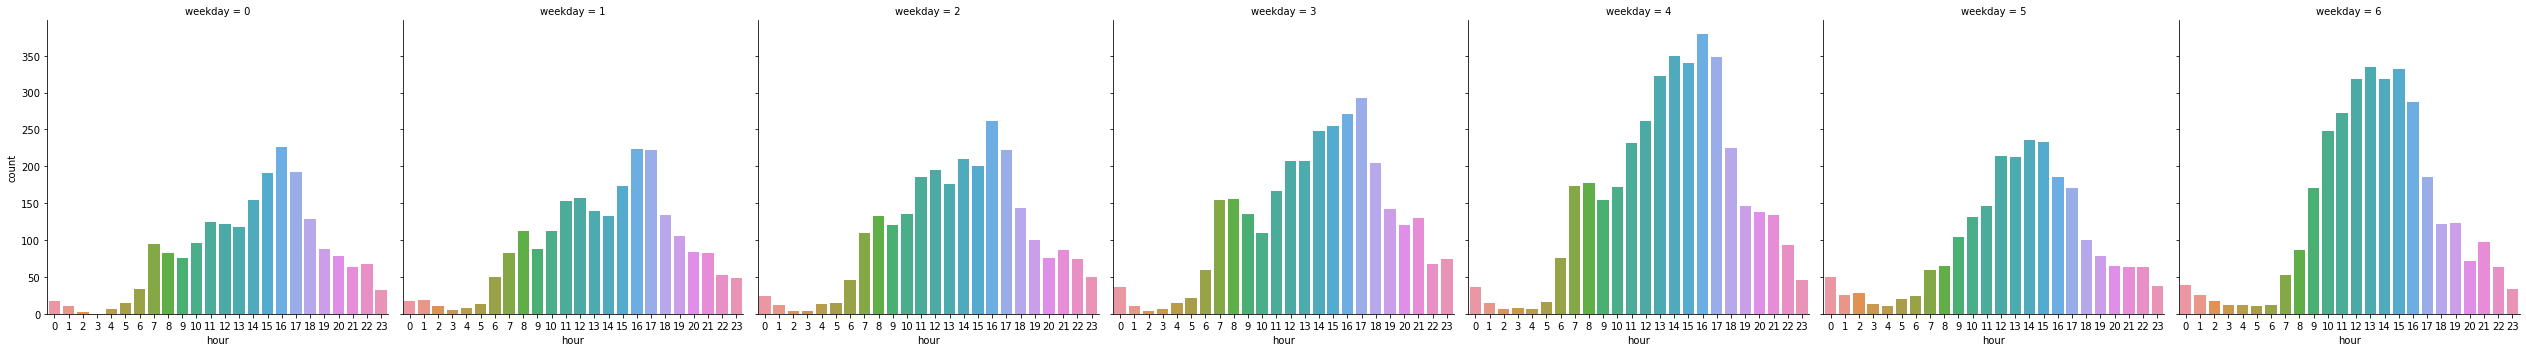

In [20]:
import datetime as dt
%matplotlib inline

october_data['weekday'] = october_data['started_at'].dt.dayofweek
october_data['hour'] = october_data['started_at'].dt.hour

sns.catplot(data=october_data,
           kind='count',
           x='hour',
           col_wrap=7,
           col='weekday')